# Symmetric vs asymmetric parcellation


In [6]:
import sys
sys.path.append("..")
import ProbabilisticParcellation.evaluate as ev
import ProbabilisticParcellation.util as ut
import ProbabilisticParcellation.export_atlas as ea
import ProbabilisticParcellation.scripts.atlas_paper.parcel_hierarchy as ph
import ProbabilisticParcellation.scripts.atlas_paper.evaluate_atlas as eva
import hierarchical_clustering as cl
from Functional_Fusion.dataset import *
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import torch as pt

# Figure settings
figsize = (8, 8)
bordersize = 4
labels = None

background = 'white'
if background == 'black':
    fontcolor = 'w'
    bordercolor = 'w'
    backgroundcolor = 'k'
elif background == 'white':
    fontcolor = 'k'
    bordercolor = 'k'
    backgroundcolor = 'w'





# Individual Parcellations

In [5]:
atlas = 'MNISymC2'
figsize = (20, 20)
model_pair = ['Models_03/NettekovenSym32_space-MNISymC2',
              'Models_03/NettekovenAsym32_space-MNISymC2']

# get individual parcellations (previously saved as pytorch tensor to save time. Use the export_uhats function in symmetry.py to recompute)
prob_sym_indiv = pt.load(f'{ut.model_dir}/Models/{model_pair[0]}_Uhat.pt')
prob_asym_indiv = pt.load(f'{ut.model_dir}/Models/{model_pair[1]}_Uhat.pt')

# Get parcels
parcels_indiv_sym = np.array(prob_sym_indiv.argmax(axis=1) + 1)
parcels_indiv_asym = np.array(prob_asym_indiv.argmax(axis=1) + 1)


In [4]:
lut_dir = '/Volumes/diedrichsen_data$/data/Cerebellum/ProbabilisticParcellationModel/Atlases/'
_, cmap_labels, labels = nt.read_lut(ut.export_dir +
                                     'NettekovenSym32.lut')


In [10]:
# Zip the first dimensions of the two arrays together to get a list of parcellations 
# where the same subject's asymmetric and symmetric parcellations are next to each other
parcels_indiv = np.array(
    list(zip(parcels_indiv_sym[0, :].tolist(), parcels_indiv_asym[0, :].tolist())))

parcel_pairs = [(row1, row2)
                 for row1, row2 in zip(parcels_indiv_sym, parcels_indiv_asym)]
# Extract tuples (converting to float32 is temporary fix of flatmap issue)
parcels_indiv = [el.astype(float) for pair in parcel_pairs for el in pair]


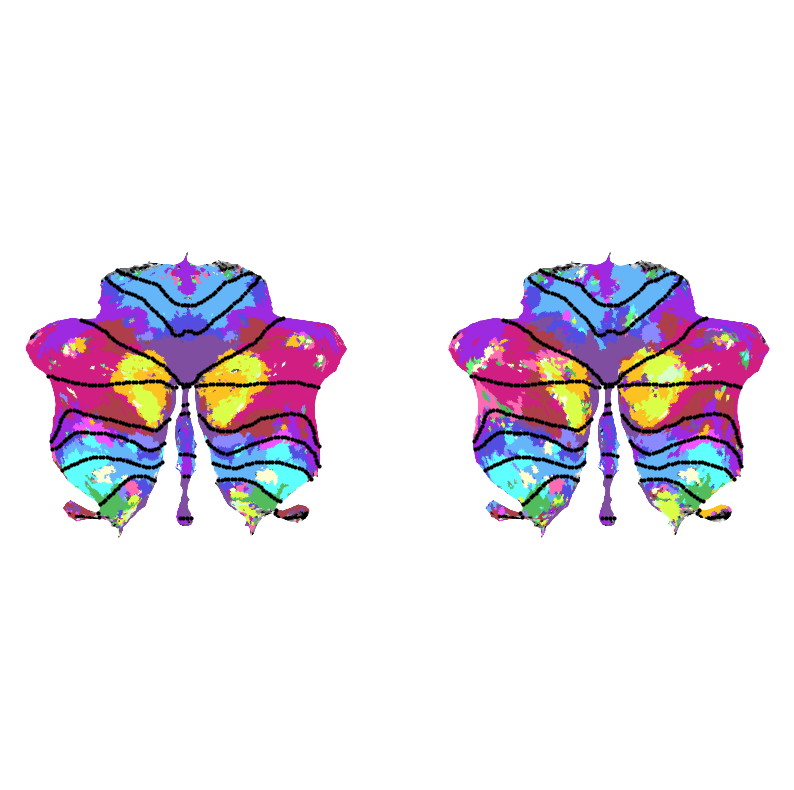

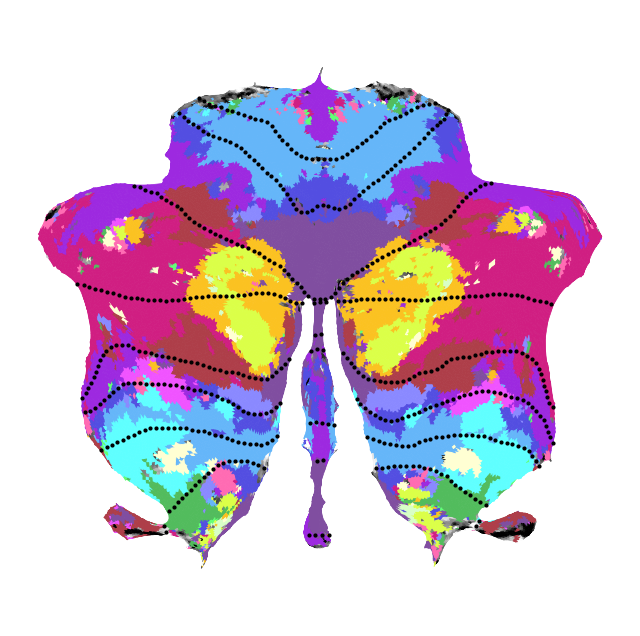

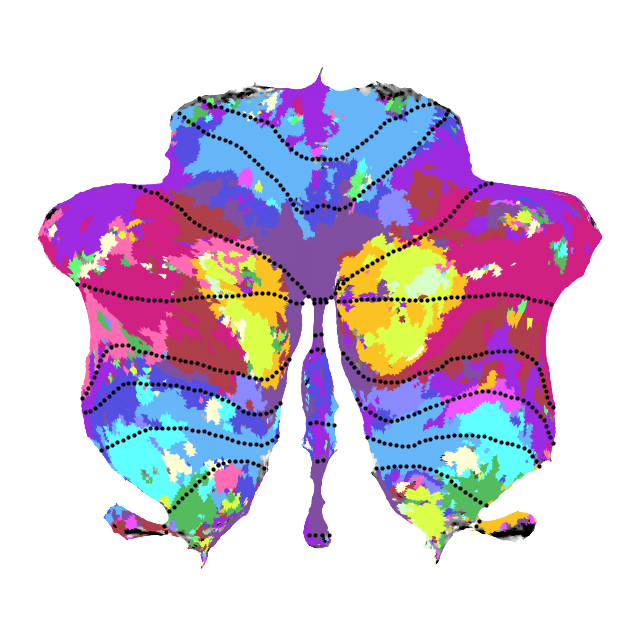

In [26]:
select_subject = 7


plt.figure(figsize=(10, 10))
ax = ut.plot_multi_flat(list(parcel_pairs[select_subject]), atlas,
                        dtype='label',
                        grid=(1, 2),
                        cmap=cmap_labels,
                        colorbar=False,
                        )
plt.show()



plt.figure(figsize=figsize)
ax = ut.plot_data_flat(parcel_pairs[select_subject][0], atlas,
                        dtype='label',
                        cmap=cmap_labels,
                        labels=labels,
                        bordercolor=bordercolor,
                        backgroundcolor=backgroundcolor,
                        bordersize=bordersize,
                        )
plt.savefig(ut.figure_dir + f'Subject-{select_subject:02d}_sym.png',
            dpi=300, bbox_inches='tight')


plt.figure(figsize=figsize)
ax = ut.plot_data_flat(parcel_pairs[select_subject][1], atlas,
                       dtype='label',
                       cmap=cmap_labels,
                       labels=labels,
                       bordercolor=bordercolor,
                       backgroundcolor=backgroundcolor,
                       bordersize=bordersize,
                       )
plt.savefig(ut.figure_dir + f'Subject-{select_subject:02d}_asym.png',
            dpi=300, bbox_inches='tight')


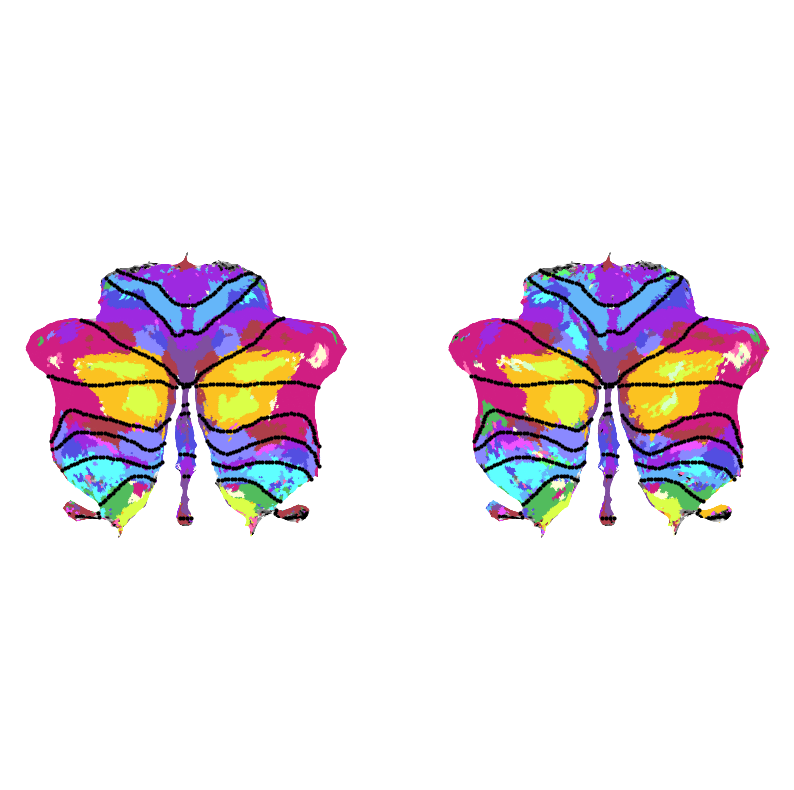

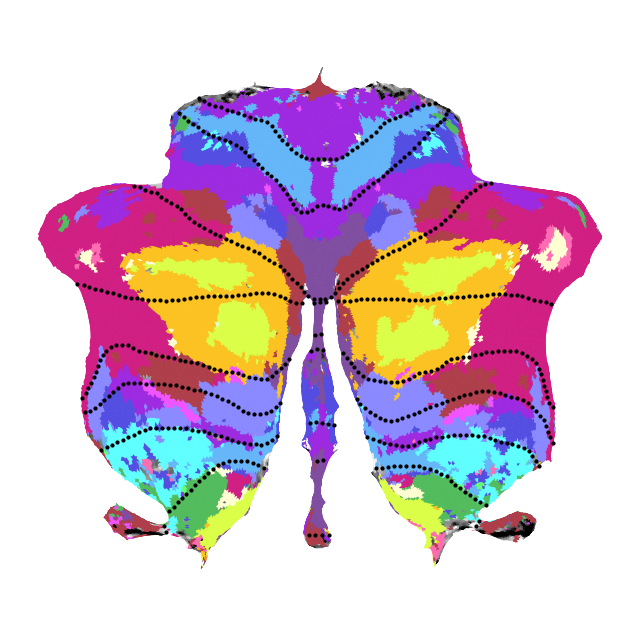

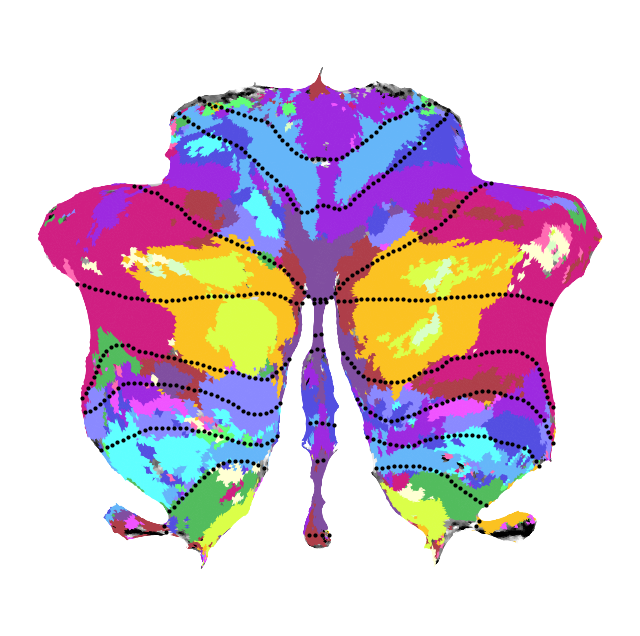

In [27]:
select_subject = 6


plt.figure(figsize=(10, 10))
ax = ut.plot_multi_flat(list(parcel_pairs[select_subject]), atlas,
                        dtype='label',
                        grid=(1, 2),
                        cmap=cmap_labels,
                        colorbar=False,
                        )
plt.show()


plt.figure(figsize=figsize)
ax = ut.plot_data_flat(parcel_pairs[select_subject][0], atlas,
                       dtype='label',
                       cmap=cmap_labels,
                       labels=labels,
                       bordercolor=bordercolor,
                       backgroundcolor=backgroundcolor,
                       bordersize=bordersize,
                       )
plt.savefig(ut.figure_dir + f'Subject-{select_subject:02d}_sym.png',
            dpi=300, bbox_inches='tight')


plt.figure(figsize=figsize)
ax = ut.plot_data_flat(parcel_pairs[select_subject][1], atlas,
                       dtype='label',
                       cmap=cmap_labels,
                       labels=labels,
                       bordercolor=bordercolor,
                       backgroundcolor=backgroundcolor,
                       bordersize=bordersize,
                       )
plt.savefig(ut.figure_dir + f'Subject-{select_subject:02d}_asym.png',
            dpi=300, bbox_inches='tight')


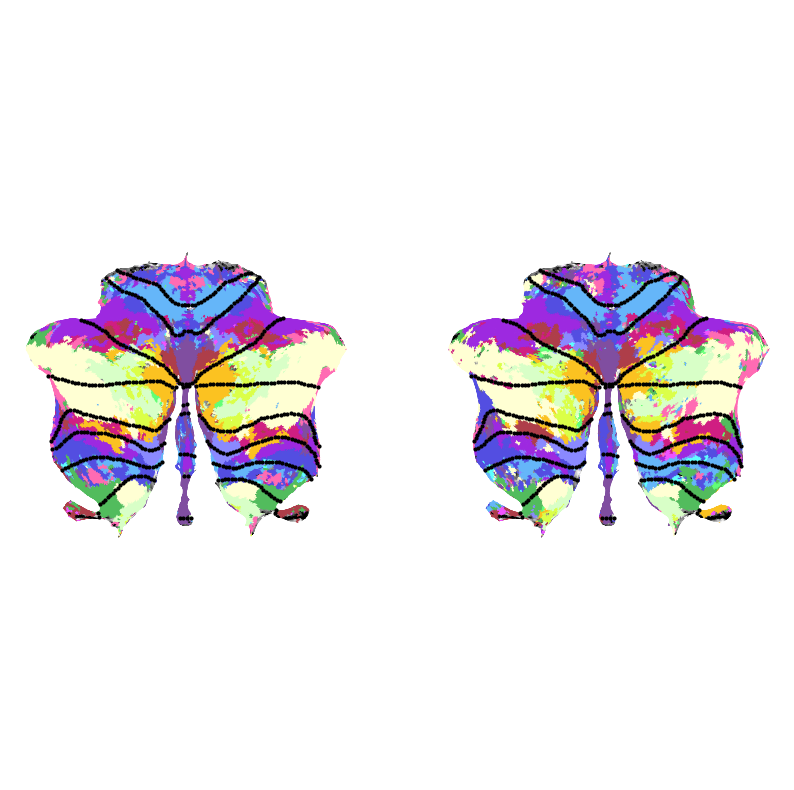

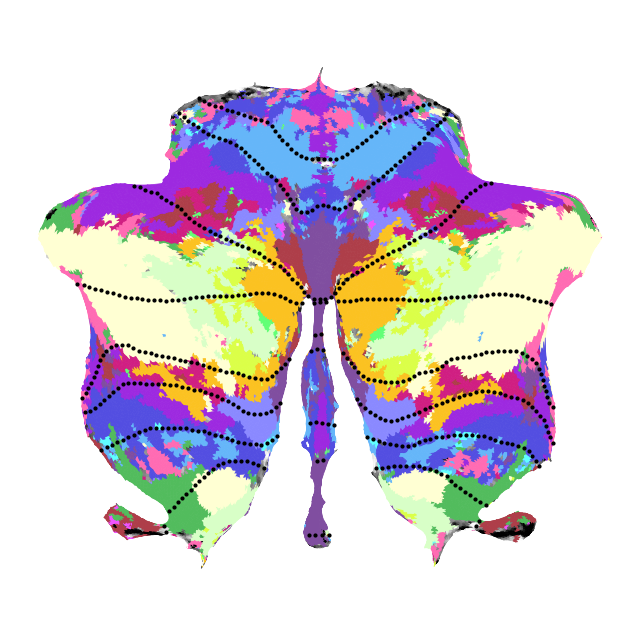

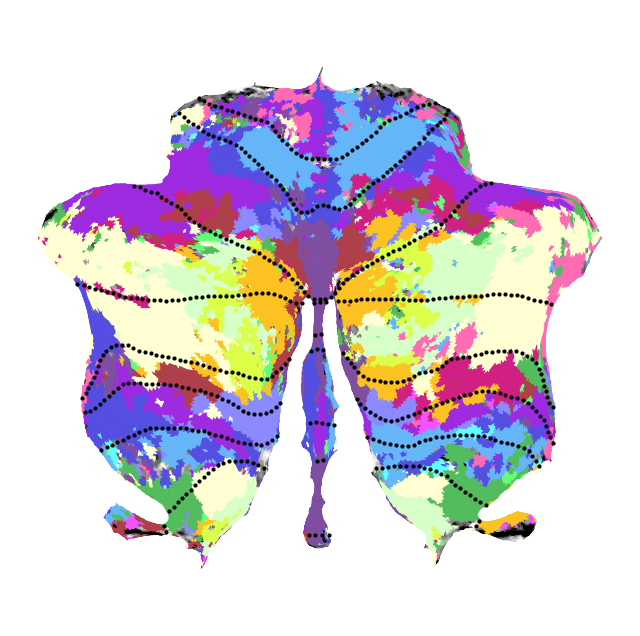

In [30]:
select_subject = 14


plt.figure(figsize=(10, 10))
ax = ut.plot_multi_flat(list(parcel_pairs[select_subject]), atlas,
                        dtype='label',
                        grid=(1, 2),
                        cmap=cmap_labels,
                        colorbar=False,
                        )
plt.show()


plt.figure(figsize=figsize)
ax = ut.plot_data_flat(parcel_pairs[select_subject][0], atlas,
                       dtype='label',
                       cmap=cmap_labels,
                       labels=labels,
                       bordercolor=bordercolor,
                       backgroundcolor=backgroundcolor,
                       bordersize=bordersize,
                       )
plt.savefig(ut.figure_dir + f'Subject-{select_subject:02d}_sym.png',
            dpi=300, bbox_inches='tight')


plt.figure(figsize=figsize)
ax = ut.plot_data_flat(parcel_pairs[select_subject][1], atlas,
                       dtype='label',
                       cmap=cmap_labels,
                       labels=labels,
                       bordercolor=bordercolor,
                       backgroundcolor=backgroundcolor,
                       bordersize=bordersize,
                       )
plt.savefig(ut.figure_dir + f'Subject-{select_subject:02d}_asym.png',
            dpi=300, bbox_inches='tight')


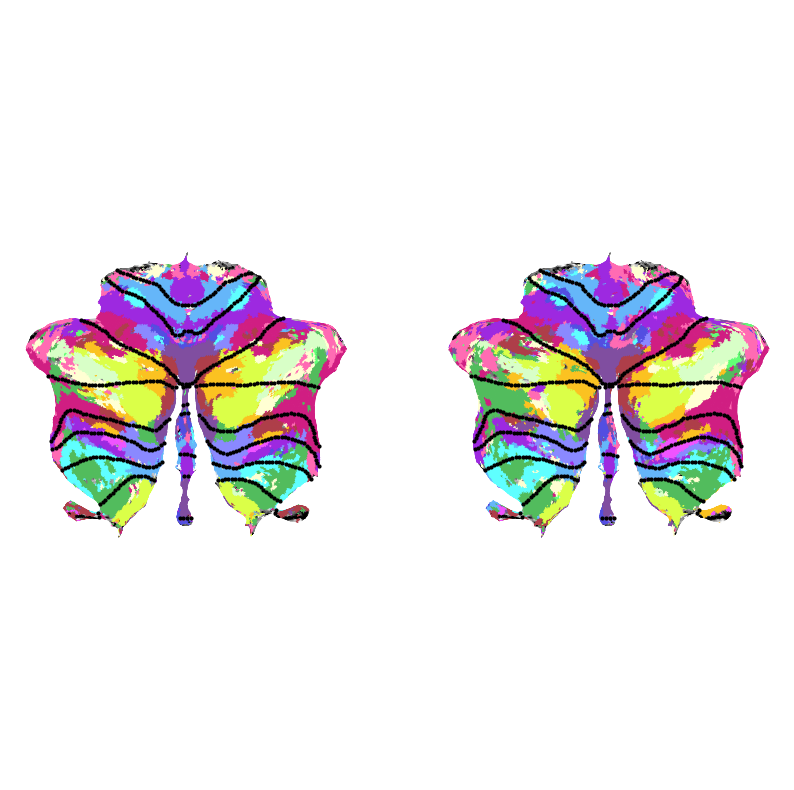

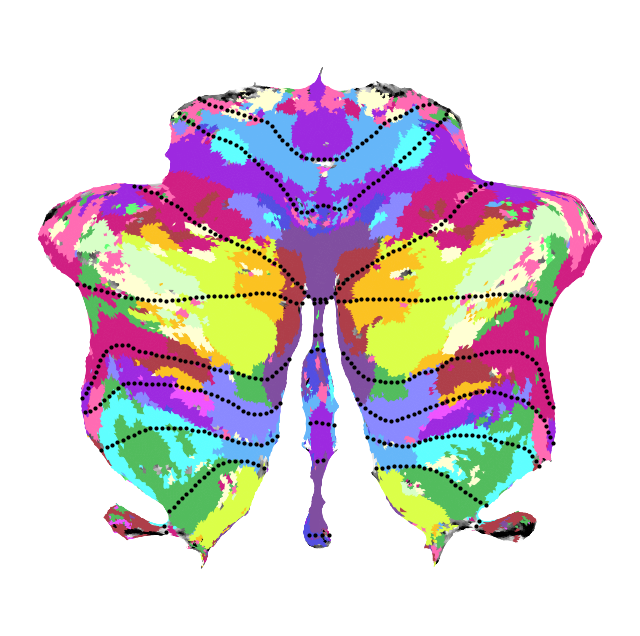

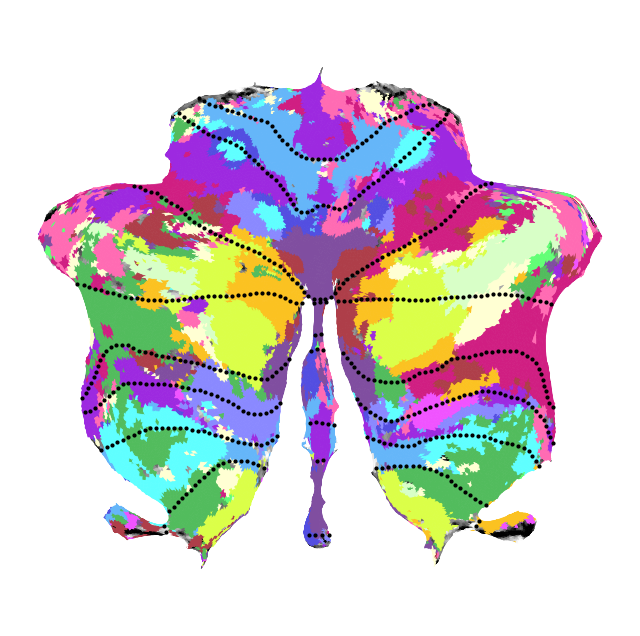

In [28]:
select_subject = 16


plt.figure(figsize=(10, 10))
ax = ut.plot_multi_flat(list(parcel_pairs[select_subject]), atlas,
                        dtype='label',
                        grid=(1, 2),
                        cmap=cmap_labels,
                        colorbar=False,
                        )
plt.show()


plt.figure(figsize=figsize)
ax = ut.plot_data_flat(parcel_pairs[select_subject][0], atlas,
                       dtype='label',
                       cmap=cmap_labels,
                       labels=labels,
                       bordercolor=bordercolor,
                       backgroundcolor=backgroundcolor,
                       bordersize=bordersize,
                       )
plt.savefig(ut.figure_dir + f'Subject-{select_subject:02d}_sym.png',
            dpi=300, bbox_inches='tight')


plt.figure(figsize=figsize)
ax = ut.plot_data_flat(parcel_pairs[select_subject][1], atlas,
                       dtype='label',
                       cmap=cmap_labels,
                       labels=labels,
                       bordercolor=bordercolor,
                       backgroundcolor=backgroundcolor,
                       bordersize=bordersize,
                       )
plt.savefig(ut.figure_dir + f'Subject-{select_subject:02d}_asym.png',
            dpi=300, bbox_inches='tight')


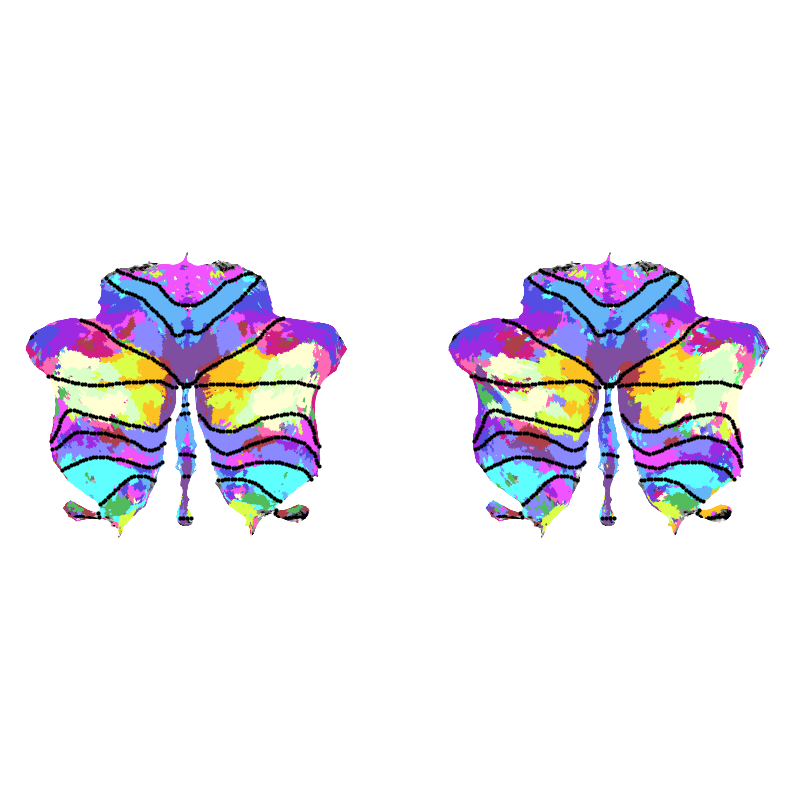

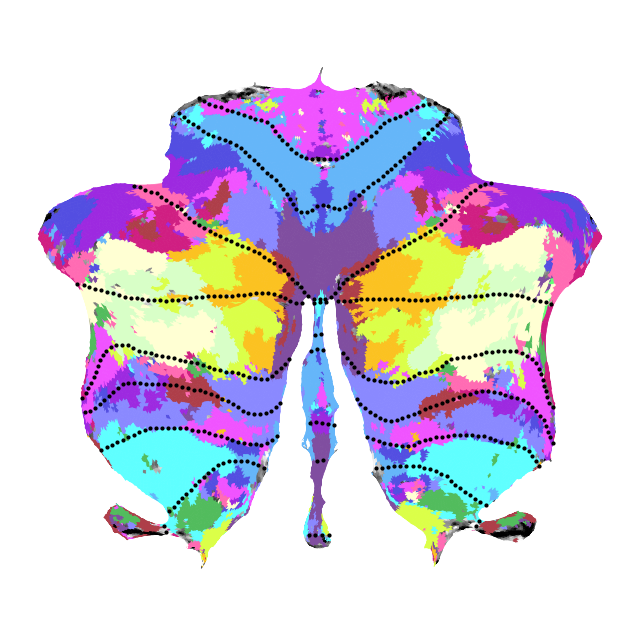

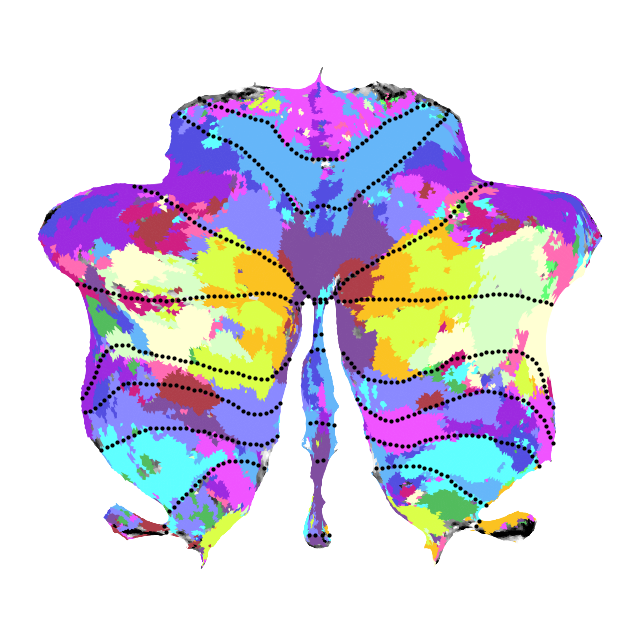

In [31]:
select_subject = 17


plt.figure(figsize=(10, 10))
ax = ut.plot_multi_flat(list(parcel_pairs[select_subject]), atlas,
                        dtype='label',
                        grid=(1, 2),
                        cmap=cmap_labels,
                        colorbar=False,
                        )
plt.show()


plt.figure(figsize=figsize)
ax = ut.plot_data_flat(parcel_pairs[select_subject][0], atlas,
                       dtype='label',
                       cmap=cmap_labels,
                       labels=labels,
                       bordercolor=bordercolor,
                       backgroundcolor=backgroundcolor,
                       bordersize=bordersize,
                       )
plt.savefig(ut.figure_dir + f'Subject-{select_subject:02d}_sym.png',
            dpi=300, bbox_inches='tight')


plt.figure(figsize=figsize)
ax = ut.plot_data_flat(parcel_pairs[select_subject][1], atlas,
                       dtype='label',
                       cmap=cmap_labels,
                       labels=labels,
                       bordercolor=bordercolor,
                       backgroundcolor=backgroundcolor,
                       bordersize=bordersize,
                       )
plt.savefig(ut.figure_dir + f'Subject-{select_subject:02d}_asym.png',
            dpi=300, bbox_inches='tight')


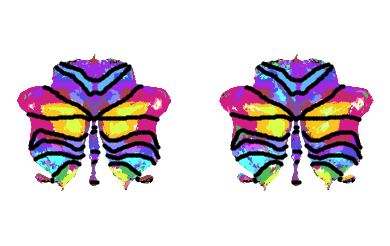

In [17]:

plt.figure(figsize=(10, 10))
ax = ut.plot_multi_flat(parcels_indiv[12:14], atlas,
                        dtype='label',
                        grid=(3, 4),
                        cmap=cmap_labels,
                        cscale=(0.3, 1),
                        colorbar=False)
plt.show()


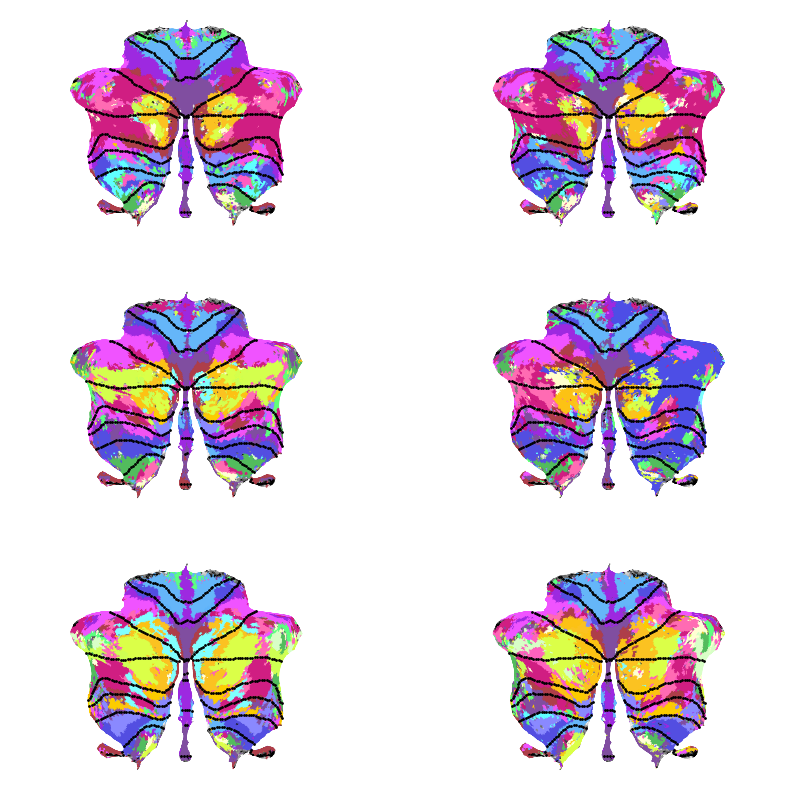

In [32]:

example_subj = [7, 8, 9]
indices = [int(el * 2) for el in example_subj]
indices = [(el, el + 1) for el in indices]
indices = [int(el) for pair in indices for el in pair]
subset = [parcels_indiv[i] for i in indices]


plt.figure(figsize=(10, 10))
ax = ut.plot_multi_flat(subset, atlas,
                        dtype='label',
                        grid=(3, 2),
                        cmap=cmap_labels,
                        cscale=(0.3, 1),
                        colorbar=False)


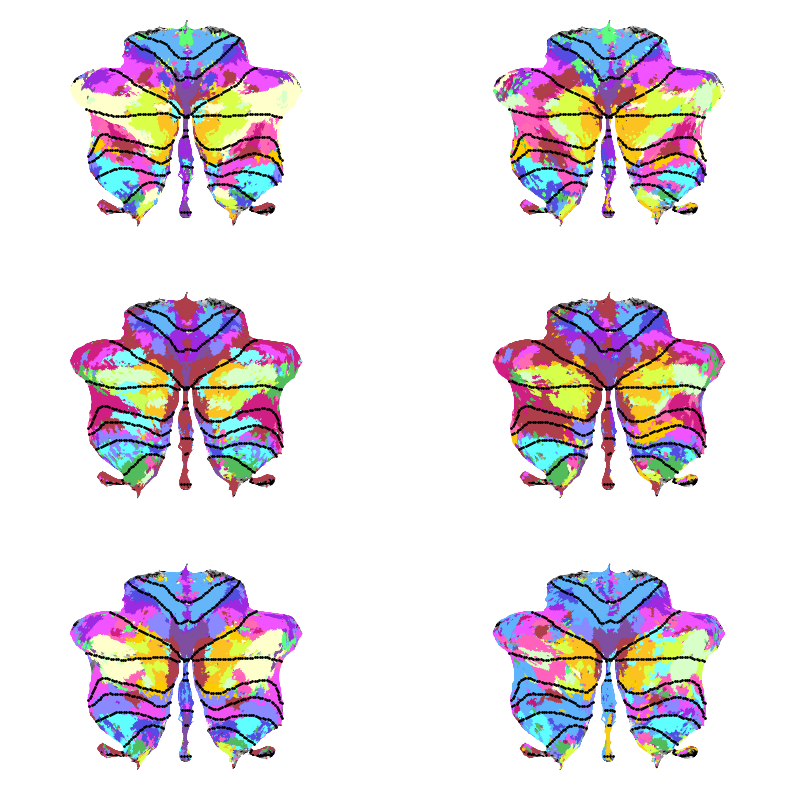

In [33]:

# Plot Example subjects: 14, 16, 18
# get indices for subjects 14, 16, 18. 

example_subj = [13, 15, 17]
indices = [int(el * 2) for el in example_subj]
indices = [(el, el + 1) for el in indices]
indices = [int(el) for pair in indices for el in pair]
subset = [parcels_indiv[i] for i in indices]



plt.figure(figsize=(10, 10))
ax = ut.plot_multi_flat(subset, atlas,
                        dtype='label',
                        grid=(3, 2),
                        cmap=cmap_labels,
                        cscale=(0.3, 1),
                        colorbar=False)


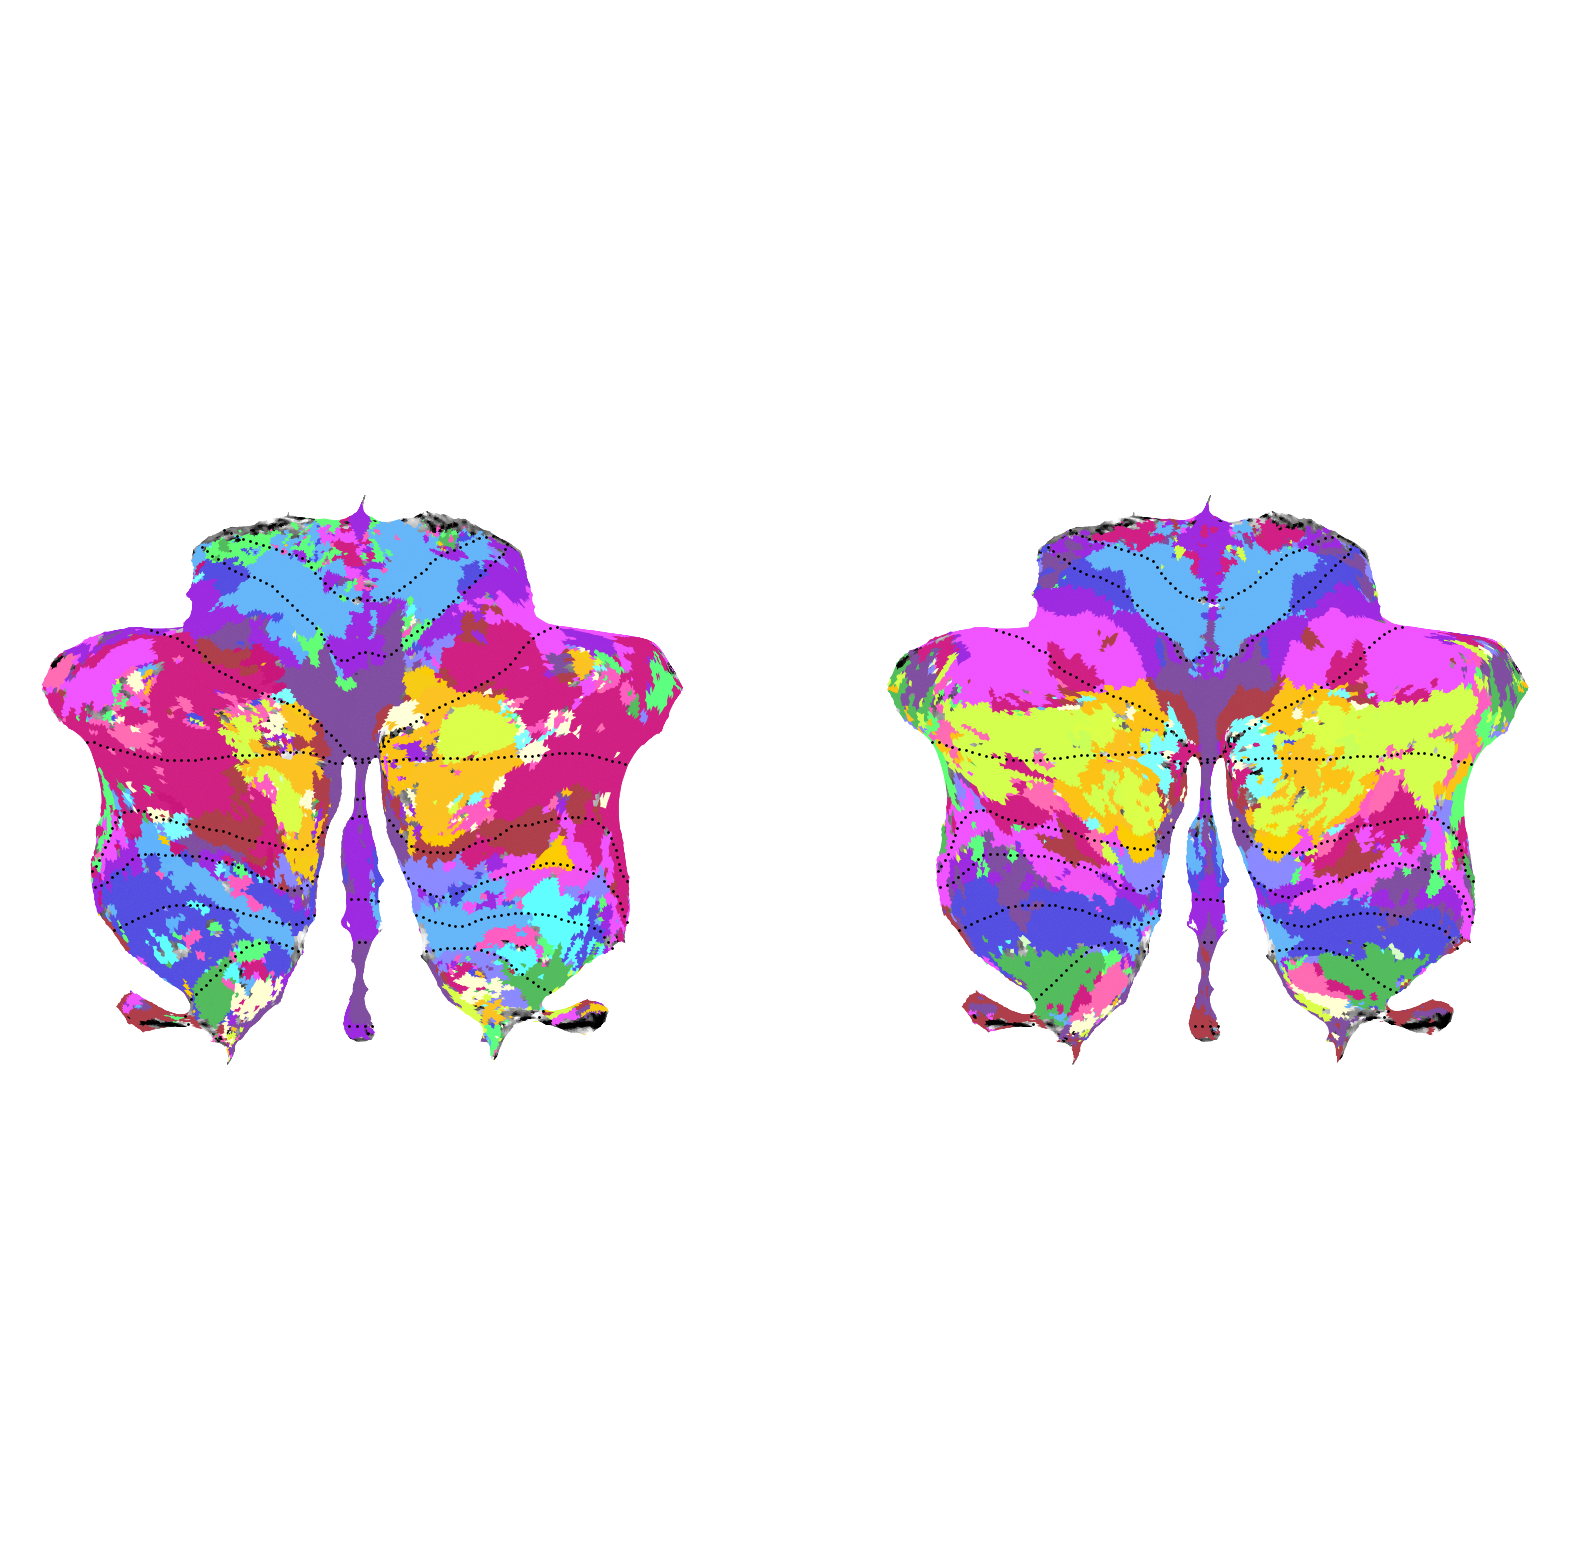

In [8]:
subset = [parcels_indiv[i] for i in [15,16]]


plt.figure(figsize=(20, 20))
ax = ut.plot_multi_flat(subset, atlas,
                        dtype='label',
                        grid=(1, 2),
                        cmap=cmap_labels,
                        cscale=(0.3, 1),
                        colorbar=False)
plt.savefig(ut.figure_dir + f'Individual_parcellation_example01.png',
            dpi=300, bbox_inches='tight')


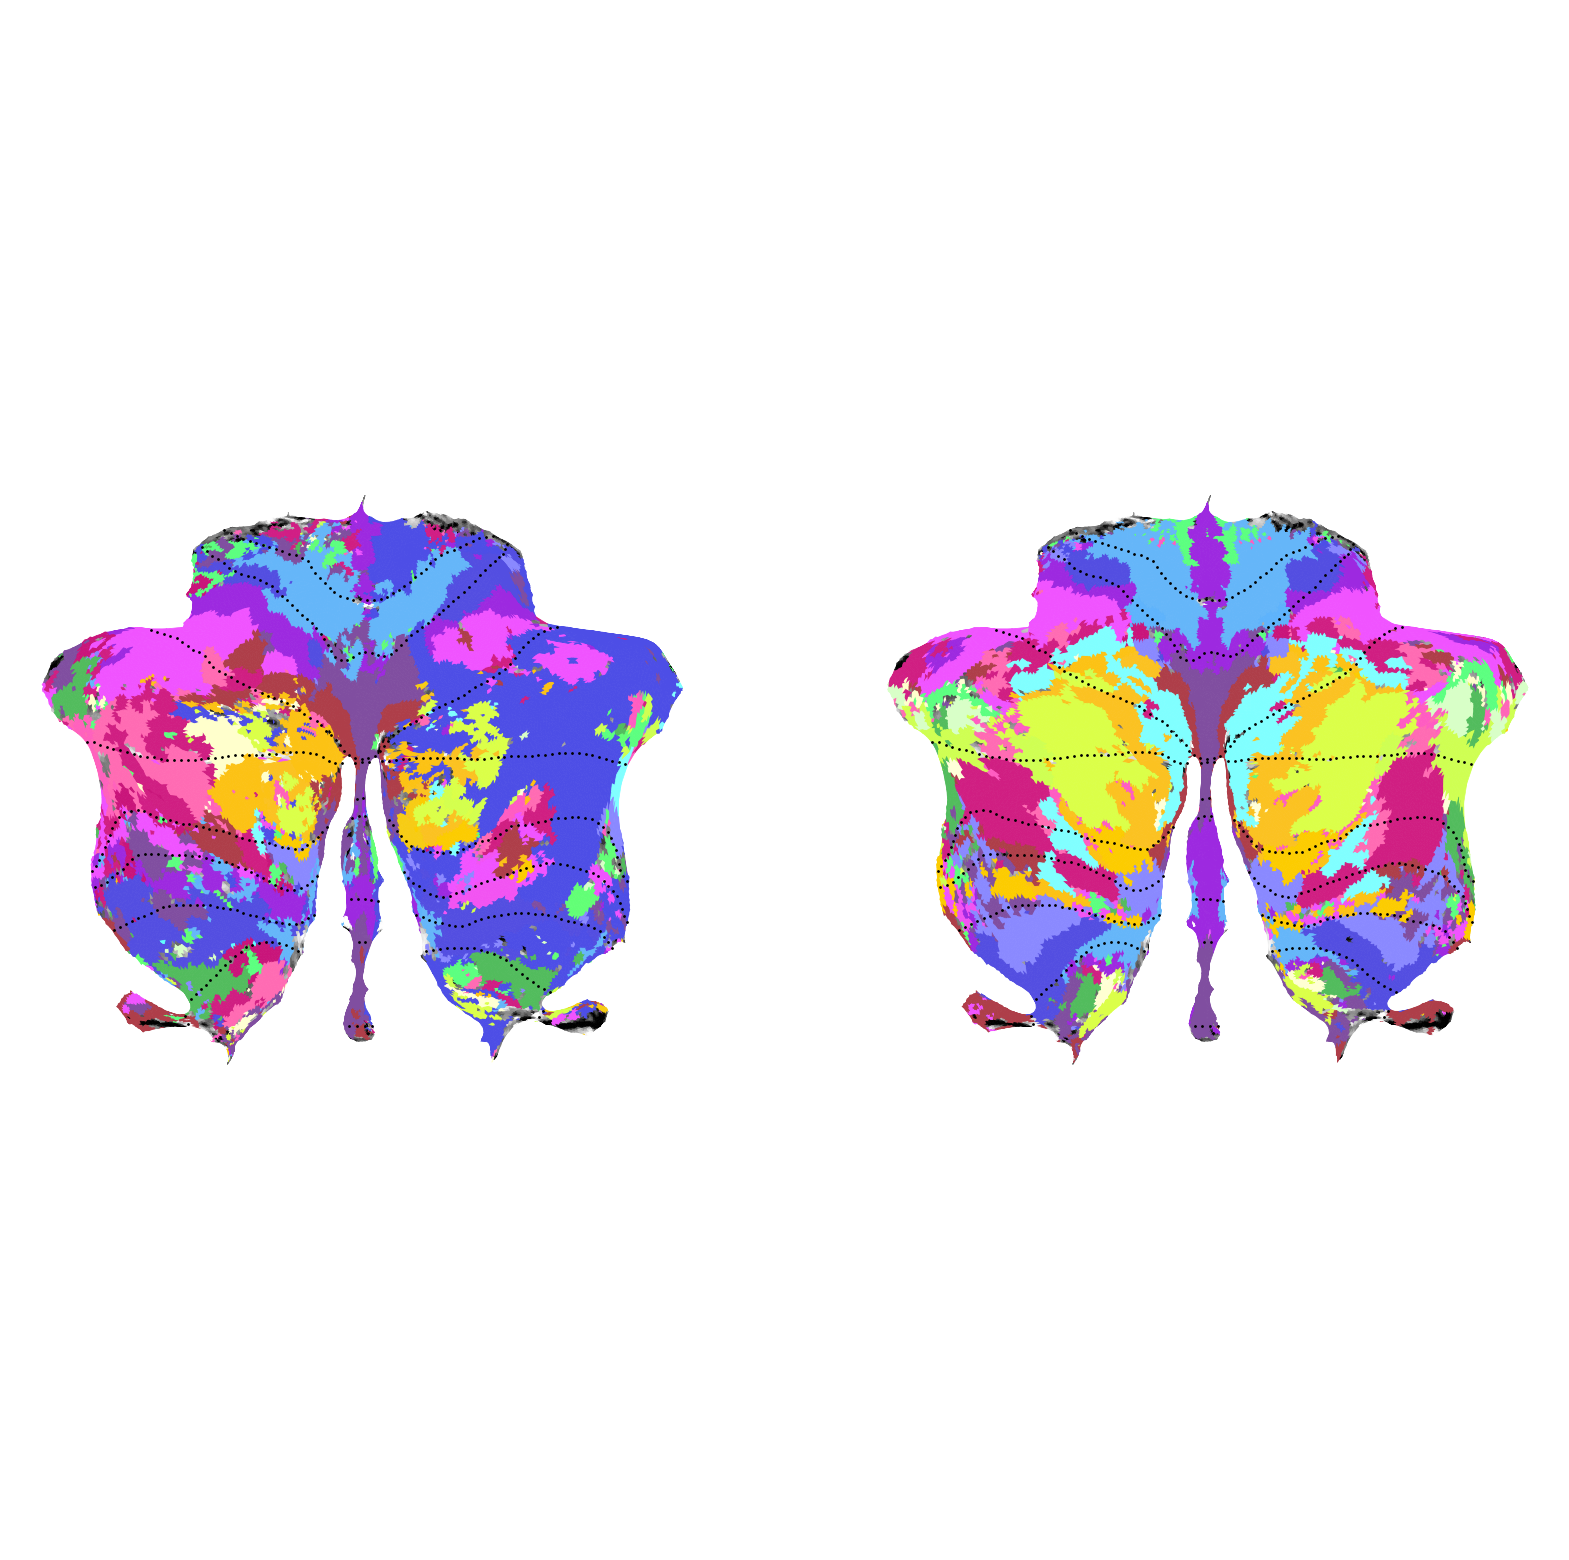

In [7]:
subset = [parcels_indiv[i] for i in [17, 18]]


plt.figure(figsize=(20, 20))
ax = ut.plot_multi_flat(subset, atlas,
                        dtype='label',
                        grid=(1, 2),
                        cmap=cmap_labels,
                        cscale=(0.3, 1),
                        colorbar=False)
plt.savefig(ut.figure_dir + f'Individual_parcellation_example02.png',
            dpi=300, bbox_inches='tight')
